## Prácticas Naive Bayes y KNN (ejercicio 3)

#### 1. Tomando como base este [tutorial](https://colab.research.google.com/drive/1zFIOfrceEaFkhQOEOkMWroBmNV1HAMVS?usp=drive_link),  crea un modelo de clasificación usando KNN con los mismos datos sintéticos. Para la elección de los mejores hiperparámetros usa un sistema de [validación cruzada](https://educacionadistancia.juntadeandalucia.es/centros/cordoba/pluginfile.php/406946/mod_resource/content/1/M2_SAA_S10%20-%20Validaci%C3%B3n.pdf).

#### 2. Usando los datos almacenados en data2.csv, crea un modelo de clasificación usando los modelos de NaiveBayes mostrados en el [vídeo 5](https://vimeo.com/600140324). Indicad qué modelo da mejores resultados. Os toca investigar cómo cargar un archivo csv desde Google Collab.

#### **3. En este [enlace](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.**

#### 4. Plantea el problema anterior con un modelo de regresión usando KNN. En el [vídeo 7](https://vimeo.com/600141357) hay un ejemplo de regresión con KNN.

#### author: Virginia Ordoño Bernier - date: december 2023


### 1. Carga de datos

In [31]:
# from google.colab import files
import io
import pandas as pd
import numpy as np

# Carga de datos
# wine_data= '/content/drive/MyDrive/AI/SAA/data/wine_data.csv'

wine_data = pd.read_csv("data/winequality-red.csv")
wine_data.head()

# def upload_files ():
#   uploaded = files.upload()
#   for fn in uploaded.keys():
#     print('User uploaded file "{name}" with length {length} bytes'.format(
#         name=fn, length=len(uploaded[fn])))
#     df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
#     return df

# wine_data = upload_files()
# wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2. Comprobación tipo de datos y nulos

In [32]:
print(wine_data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [33]:
total_nulls = wine_data.isnull().sum()
total_nulls

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3. División de datos

In [34]:
from sklearn.model_selection import train_test_split

# Separar características (X) y etiquetas (y)
X = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = wine_data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba (60% entrenamiento, 40% test)
# Random-state para obtener siempre la misma división de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### 4. Creación del modelo y entrenamiento Gaussian NB

In [35]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

#### 4.1. Predicción y evaluación

In [36]:
from sklearn.metrics import accuracy_score, classification_report

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Mostrar el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.5375

Informe de clasificación:
              precision    recall  f1-score   support

           3       0.25      0.50      0.33         2
           4       0.09      0.09      0.09        23
           5       0.70      0.61      0.65       278
           6       0.52      0.56      0.54       248
           7       0.40      0.36      0.38        81
           8       0.08      0.25      0.12         8

    accuracy                           0.54       640
   macro avg       0.34      0.40      0.35       640
weighted avg       0.56      0.54      0.55       640



#### 4.2. Matriz de Confusión

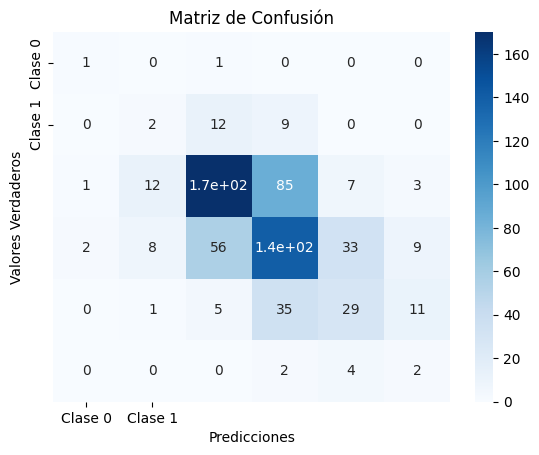

In [37]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

classes = ('Clase 0', 'Clase 1')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

### 5. Creación del modelo y entrenamiento KNN